# UCI Bilkent Arrythmia Detection
# Data Analysis and Preprocessing of Dataset

In [324]:
# Import libraries

import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

from scipy import stats
import os
import glob
import datetime
from tqdm import tqdm,trange,tqdm_notebook

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# Suppress the warnings
import warnings
warnings.filterwarnings(action='ignore')

print('Imported all libraries successfully.')


Imported all libraries successfully.


In [325]:
cols=['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval', 'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'chDI_Qwave', 'chDI_Rwave', 'chDI_Swave', 'chDI_RPwave', 'chDI_SPwave', 'chDI_intrinsicReflecttions', 'chDI_RRwaveExists', 'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists', 'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Qwave', 'chDII_Rwave', 'chDII_Swave', 'chDII_RPwave', 'chDII_SPwave', 'chDII_intrinsicReflecttions', 'chDII_RRwaveExists', 'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists', 'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Qwave', 'chDIII_Rwave', 'chDIII_Swave', 'chDIII_RPwave', 'chDIII_SPwave', 'chDIII_intrinsicReflecttions', 'chDIII_RRwaveExists', 'chDIII_DD_RRwaveExists', 'chDIII_RPwaveExists', 'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists', 'chDIII_DD_RTwaveExists', 'chAVR_Qwave', 'chAVR_Rwave', 'chAVR_Swave', 'chAVR_RPwave', 'chAVR_SPwave', 'chAVR_intrinsicReflecttions', 'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists', 'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists', 'chAVL_Qwave', 'chAVL_Rwave', 'chAVL_Swave', 'chAVL_RPwave', 'chAVL_SPwave', 'chAVL_intrinsicReflecttions', 'chAVL_RRwaveExists', 'chAVL_DD_RRwaveExists', 'chAVL_RPwaveExists', 'chAVL_DD_RPwaveExists', 'chAVL_RTwaveExists', 'chAVL_DD_RTwaveExists', 'chAVF_Qwave', 'chAVF_Rwave', 'chAVF_Swave', 'chAVF_RPwave', 'chAVF_SPwave', 'chAVF_intrinsicReflecttions', 'chAVF_RRwaveExists', 'chAVF_DD_RRwaveExists', 'chAVF_RPwaveExists', 'chAVF_DD_RPwaveExists', 'chAVF_RTwaveExists', 'chAVF_DD_RTwaveExists', 'chV1_Qwave', 'chV1_Rwave', 'chV1_Swave', 'chV1_RPwave', 'chV1_SPwave', 'chV1_intrinsicReflecttions', 'chV1_RRwaveExists', 'chV1_DD_RRwaveExists', 'chV1_RPwaveExists', 'chV1_DD_RPwaveExists', 'chV1_RTwaveExists', 'chV1_DD_RTwaveExists', 'chV2_Qwave', 'chV2_Rwave', 'chV2_Swave', 'chV2_RPwave', 'chV2_SPwave', 'chV2_intrinsicReflecttions', 'chV2_RRwaveExists', 'chV2_DD_RRwaveExists', 'chV2_RPwaveExists', 'chV2_DD_RPwaveExists', 'chV2_RTwaveExists', 'chV2_DD_RTwaveExists', 'chV3_Qwave', 'chV3_Rwave', 'chV3_Swave', 'chV3_RPwave', 'chV3_SPwave', 'chV3_intrinsicReflecttions', 'chV3_RRwaveExists', 'chV3_DD_RRwaveExists', 'chV3_RPwaveExists', 'chV3_DD_RPwaveExists', 'chV3_RTwaveExists', 'chV3_DD_RTwaveExists', 'chV4_Qwave', 'chV4_Rwave', 'chV4_Swave', 'chV4_RPwave', 'chV4_SPwave', 'chV4_intrinsicReflecttions', 'chV4_RRwaveExists', 'chV4_DD_RRwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists', 'chV4_RTwaveExists', 'chV4_DD_RTwaveExists', 'chV5_Qwave', 'chV5_Rwave', 'chV5_Swave', 'chV5_RPwave', 'chV5_SPwave', 'chV5_intrinsicReflecttions', 'chV5_RRwaveExists', 'chV5_DD_RRwaveExists', 'chV5_RPwaveExists', 'chV5_DD_RPwaveExists', 'chV5_RTwaveExists', 'chV5_DD_RTwaveExists', 'chV6_Qwave', 'chV6_Rwave', 'chV6_Swave', 'chV6_RPwave', 'chV6_SPwave', 'chV6_intrinsicReflecttions', 'chV6_RRwaveExists', 'chV6_DD_RRwaveExists', 'chV6_RPwaveExists', 'chV6_DD_RPwaveExists', 'chV6_RTwaveExists', 'chV6_DD_RTwaveExists', 'chDI_JJwaveAmp', 'chDI_QwaveAmp', 'chDI_RwaveAmp', 'chDI_SwaveAmp', 'chDI_RPwaveAmp', 'chDI_SPwaveAmp', 'chDI_PwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSA', 'chDI_QRSTA', 'chDII_JJwaveAmp', 'chDII_QwaveAmp', 'chDII_RwaveAmp', 'chDII_SwaveAmp', 'chDII_RPwaveAmp', 'chDII_SPwaveAmp', 'chDII_PwaveAmp', 'chDII_TwaveAmp', 'chDII_QRSA', 'chDII_QRSTA', 'chDIII_JJwaveAmp', 'chDIII_QwaveAmp', 'chDIII_RwaveAmp', 'chDIII_SwaveAmp', 'chDIII_RPwaveAmp', 'chDIII_SPwaveAmp', 'chDIII_PwaveAmp', 'chDIII_TwaveAmp', 'chDIII_QRSA', 'chDIII_QRSTA', 'chAVR_JJwaveAmp', 'chAVR_QwaveAmp', 'chAVR_RwaveAmp', 'chAVR_SwaveAmp', 'chAVR_RPwaveAmp', 'chAVR_SPwaveAmp', 'chAVR_PwaveAmp', 'chAVR_TwaveAmp', 'chAVR_QRSA', 'chAVR_QRSTA', 'chAVL_JJwaveAmp', 'chAVL_QwaveAmp', 'chAVL_RwaveAmp', 'chAVL_SwaveAmp', 'chAVL_RPwaveAmp', 'chAVL_SPwaveAmp', 'chAVL_PwaveAmp', 'chAVL_TwaveAmp', 'chAVL_QRSA', 'chAVL_QRSTA', 'chAVF_JJwaveAmp', 'chAVF_QwaveAmp', 'chAVF_RwaveAmp', 'chAVF_SwaveAmp', 'chAVF_RPwaveAmp', 'chAVF_SPwaveAmp', 'chAVF_PwaveAmp', 'chAVF_TwaveAmp', 'chAVF_QRSA', 'chAVF_QRSTA', 'chV1_JJwaveAmp', 'chV1_QwaveAmp', 'chV1_RwaveAmp', 'chV1_SwaveAmp', 'chV1_RPwaveAmp', 'chV1_SPwaveAmp', 'chV1_PwaveAmp', 'chV1_TwaveAmp', 'chV1_QRSA', 'chV1_QRSTA', 'chV2_JJwaveAmp', 'chV2_QwaveAmp', 'chV2_RwaveAmp', 'chV2_SwaveAmp', 'chV2_RPwaveAmp', 'chV2_SPwaveAmp', 'chV2_PwaveAmp', 'chV2_TwaveAmp', 'chV2_QRSA', 'chV2_QRSTA', 'chV3_JJwaveAmp', 'chV3_QwaveAmp', 'chV3_RwaveAmp', 'chV3_SwaveAmp', 'chV3_RPwaveAmp', 'chV3_SPwaveAmp', 'chV3_PwaveAmp', 'chV3_TwaveAmp', 'chV3_QRSA', 'chV3_QRSTA', 'chV4_JJwaveAmp', 'chV4_QwaveAmp', 'chV4_RwaveAmp', 'chV4_SwaveAmp', 'chV4_RPwaveAmp', 'chV4_SPwaveAmp', 'chV4_PwaveAmp', 'chV4_TwaveAmp', 'chV4_QRSA', 'chV4_QRSTA', 'chV5_JJwaveAmp', 'chV5_QwaveAmp', 'chV5_RwaveAmp', 'chV5_SwaveAmp', 'chV5_RPwaveAmp', 'chV5_SPwaveAmp', 'chV5_PwaveAmp', 'chV5_TwaveAmp', 'chV5_QRSA', 'chV5_QRSTA', 'chV6_JJwaveAmp', 'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp', 'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA', 'chV6_QRSTA', 'class']
df = pd.read_csv('arrhythmia.csv', names=cols)
df.head(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4

# General DataFrame Analysis

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [327]:
df.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp

In [328]:
df.isna().sum()
print('The dataset seems to not contain any NA empty values')

The dataset seems to not contain any NA empty values


In [329]:
df_duplicates = df[df.duplicated()]
#print(df_duplicates)
print('There are no duplicated rows')

There are no duplicated rows


In [330]:
df.dtypes
print('The sex feature is already in 0-1 format, will check int64 vs float on the features, but first will review the object dtypes')

The sex feature is already in 0-1 format, will check int64 vs float on the features, but first will review the object dtypes


# Fixing the Object Columns

In [331]:
# create a list of the obj column names
df_obj = df.select_dtypes(include=['object']).columns
df_obj

Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

In [332]:
# first swap the '?' with a NaN
for o in df_obj:
    df[o] = df[o].apply(pd.to_numeric, downcast='float', errors='coerce')

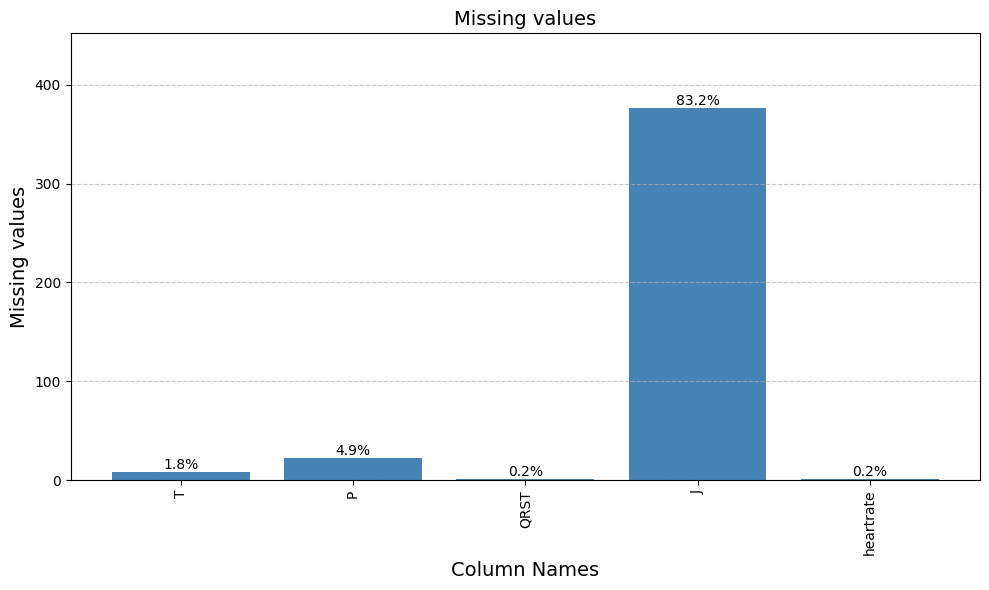

In [333]:
summary_df = df.isnull().sum()
missing_stats = summary_df[summary_df != 0].reset_index()
missing_stats.columns = ['column_name', 'no_of_missing']
missing_stats['percent_missing'] = (missing_stats['no_of_missing'] / len(df)) * 100

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(missing_stats['column_name'], missing_stats['no_of_missing'], color='steelblue')
plt.title('Missing values', fontsize= 14)
plt.xlabel('Column Names', fontsize= 14)
plt.ylabel('Missing values', fontsize= 14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for i, value in enumerate(missing_stats['percent_missing']):
    plt.text(i, missing_stats['no_of_missing'][i], f"{value:.1f}%", ha='center', va='bottom')
plt.ylim(0, len(df))  # Limit y-axis to the number of rows in DataFrame
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.savefig('Missing_values.png')  
plt.show()

NaN % in T : 2.0
NaN % in P : 5.0
NaN % in QRST : 0.0
NaN % in J : 83.0
NaN % in heartrate : 0.0


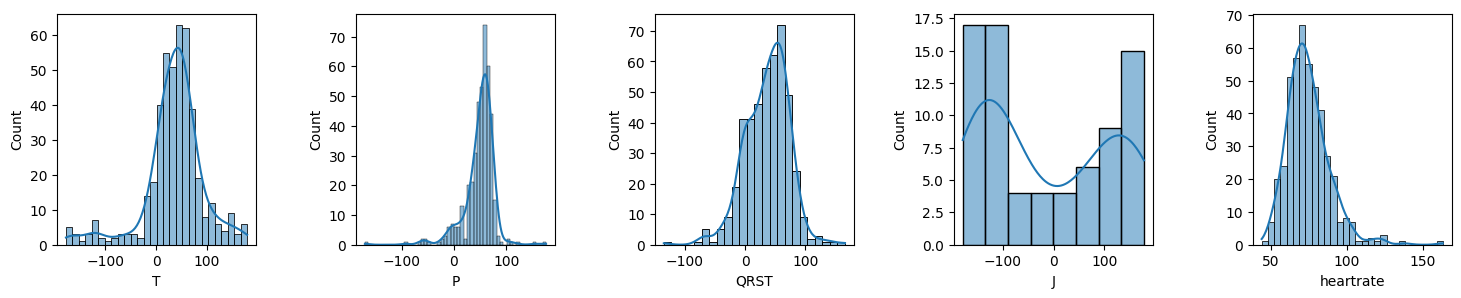

In [334]:
f, axes = plt.subplots(1, len(df_obj), figsize=(18, 3))
i=0
while i in range(len(df_obj)):
    for o in df_obj:
        sns.histplot(x=df[o], ax=axes[i], kde=True, stat='count')
        print('NaN % in', o, ':', (df[o].isna().sum()/len(df[o])).round(2)*100)
        i=i+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)
# T is somehwat left skewed, as are P and QRST
# J is bimodally distributed
# heart_rate is right skewed

In [335]:
## Remove/fill missing values 
# 1st approach: using nearest neighbor

imputer = KNNImputer(n_neighbors=2,weights="uniform")
df1 = imputer.fit_transform(df)
df1 = pd.DataFrame(df1)
df1.columns = df.columns
df1.isnull().sum().sort_values(ascending=False)

##################################################
## 2nd approach: simply fill with mean value
## Fill missing values with the mean of their respective columns 
#print('before: ', df_sel.isna().sum().sum())
#means = df_sel.mean()
##Replace missing values with 
#df_sel_filled = df_sel.fillna(means)
#print('after: ', df_sel_filled.isna().sum().sum())


age                             0
chDIII_SPwaveAmp                0
chAVR_QwaveAmp                  0
chAVR_JJwaveAmp                 0
chDIII_QRSTA                    0
chDIII_QRSA                     0
chDIII_TwaveAmp                 0
chDIII_PwaveAmp                 0
chDIII_RPwaveAmp                0
chAVR_SwaveAmp                  0
chDIII_SwaveAmp                 0
chDIII_RwaveAmp                 0
chDIII_QwaveAmp                 0
chDIII_JJwaveAmp                0
chDII_QRSTA                     0
chDII_QRSA                      0
chAVR_RwaveAmp                  0
chAVR_RPwaveAmp                 0
sex                             0
chAVL_SwaveAmp                  0
chAVL_QRSTA                     0
chAVL_QRSA                      0
chAVL_TwaveAmp                  0
chAVL_PwaveAmp                  0
chAVL_SPwaveAmp                 0
chAVL_RPwaveAmp                 0
chAVL_RwaveAmp                  0
chAVR_SPwaveAmp                 0
chAVL_QwaveAmp                  0
chAVL_JJwaveAm

In [336]:
# making our new dataframe our new dataframe
df = df1

In [337]:
# now we drop the J column, as it is mostly NaN
df.drop('J', axis=1, inplace=True)
df.head(3)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

In [338]:
#Check for missing data 
df.isna().sum().sum()
df.isnull().sum().sort_values(ascending=False)

age                             0
chDIII_PwaveAmp                 0
chAVR_RwaveAmp                  0
chAVR_QwaveAmp                  0
chAVR_JJwaveAmp                 0
chDIII_QRSTA                    0
chDIII_QRSA                     0
chDIII_TwaveAmp                 0
chDIII_SPwaveAmp                0
chDII_TwaveAmp                  0
chDIII_RPwaveAmp                0
chDIII_SwaveAmp                 0
chDIII_RwaveAmp                 0
chDIII_QwaveAmp                 0
chDIII_JJwaveAmp                0
chDII_QRSTA                     0
chAVR_SwaveAmp                  0
chAVR_RPwaveAmp                 0
chAVR_SPwaveAmp                 0
chAVR_PwaveAmp                  0
chAVR_TwaveAmp                  0
chAVR_QRSA                      0
chAVR_QRSTA                     0
chAVL_JJwaveAmp                 0
chAVL_QwaveAmp                  0
chAVL_RwaveAmp                  0
chAVL_SwaveAmp                  0
chAVL_RPwaveAmp                 0
chAVL_SPwaveAmp                 0
chAVL_PwaveAmp

# Statistical Tests

In [339]:
# Pearson's Correlation test
from scipy.stats import pearsonr
proindie = {}
prodependent = {}
unknown = {}
for c in df.columns:
    data1 = df[c]
    data2 = df['class']
    stat, p = pearsonr(data1, data2)
#    print(c, 'stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        proindie[c] = (stat,p)
    elif p > 0.00:
        prodependent[c] = (stat,p)
    else:
        unknown = {}
dependents = pd.DataFrame.from_dict(prodependent, orient='index', columns=['stat', 'p'])
dependents['stat'] = dependents['stat'].round(3)
dependents['p'] = dependents['p'].round(3)
dependents.T
dependents.index
len(dependents)

77

In [340]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
gaus = {}
nogaus = {}
unknown = {}
for c in df.columns:
    data = df[c]
    stat, p = shapiro(data)
#    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        gaus[c] = (stat,p)
    elif p > 0.00:
        nogaus[c] = (stat,p)
    else:
        unknown = {}
        
gauses = pd.DataFrame.from_dict(gaus, orient='index', columns=['stat', 'p'])
gauses['stat'] = gauses['stat'].round(3)
gauses['p'] = gauses['p'].round(3)
gauses.T
gauses.index
print(len(gaus),len(nogaus),len(unknown))

17 262 0


# Univariate Variable Analysis

we see some outliers in age, height and weight, which we will investigate


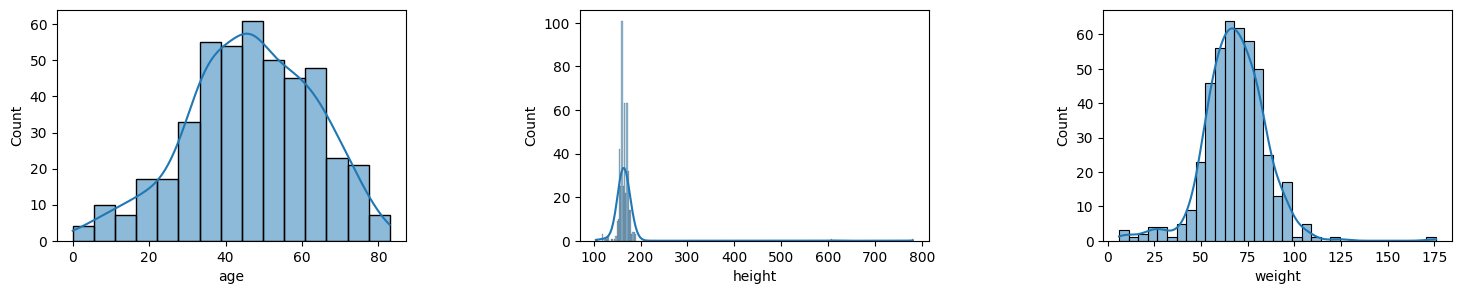

In [341]:
ahw = ['age', 'height', 'weight']
# plot the distribution of the age, height, weight column values in histplot
f, axes = plt.subplots(1, 3, figsize=(18, 3))
i=0
while i in range(3):
    for c in ahw:
        sns.histplot(x=df[c], ax=axes[i], kde=True, stat='count')
        i=i+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)
print('we see some outliers in age, height and weight, which we will investigate')

In [342]:
## this appears to be a baby
df['age'].min()
df.loc[df['age'] == 0]
baby = df.loc[df['age'] == 0].index
# beby seems close to one year old considering the weight. The height needs to be converted *0.1, though 
df.loc[baby,'height'] = df.loc[baby,'height']*0.1
df.loc[baby]
# looking at the diagnosis of 5 and a quick web research, it seems to be plausible
# https://www.luriechildrens.org/en/specialties-conditions/tachycardia/

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

In [343]:
## this also appears to be a baby
df['height'].max()
df.loc[df['height'] == 780]
baby2 = df.loc[df['height'] == 780].index
# baby2 height needs to be converted *0.1 
df.loc[baby2,'height'] = df.loc[baby2,'height']*0.1
df.loc[baby2]
# looking at the diagnosis of 5 and a quick web research, it seems to be plausible
# https://www.luriechildrens.org/en/specialties-conditions/tachycardia/


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

after fixing the outliers, theis looks more plausible


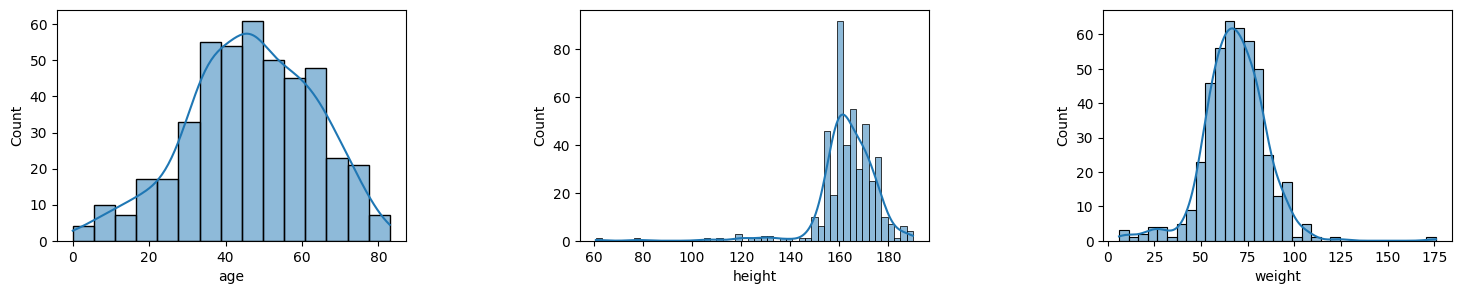

In [344]:
#check after fixes
ahw = ['age', 'height', 'weight']
# plot the distribution of the age, height, weight column values in histplot
f, axes = plt.subplots(1, 3, figsize=(18, 3))
i=0
while i in range(3):
    for c in ahw:
        sns.histplot(x=df[c], ax=axes[i], kde=True, stat='count')
        i=i+1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.1)
print('after fixing the outliers, theis looks more plausible')

the weight-height relationship looks plausible


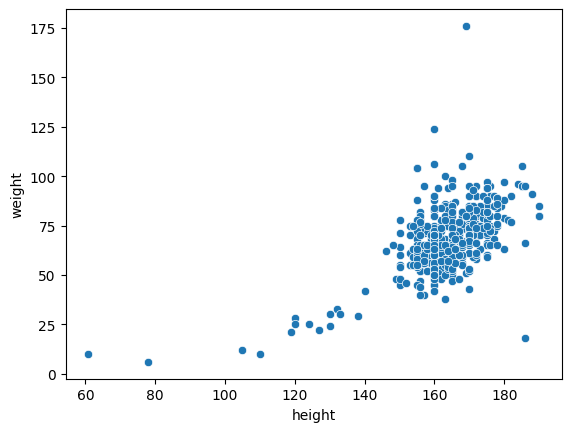

In [345]:
sns.scatterplot(data=df, x='height', y='weight')
print('the weight-height relationship looks plausible')

Sex looks fairly normally distributed - slightlty more males in the sample set, but not an issue


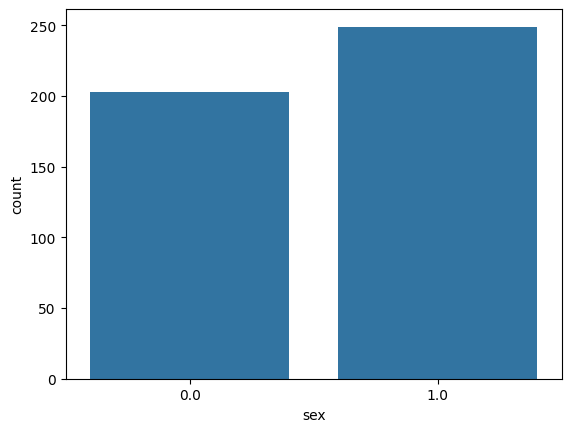

In [346]:
sns.countplot(x=df['sex']);
print('Sex looks fairly normally distributed - slightlty more males in the sample set, but not an issue')

with so many of the ecg lead columns being 90-100% zeros, it raises the question of how to proceed with them - perhaps taking this into consideration when viewing the correlation data


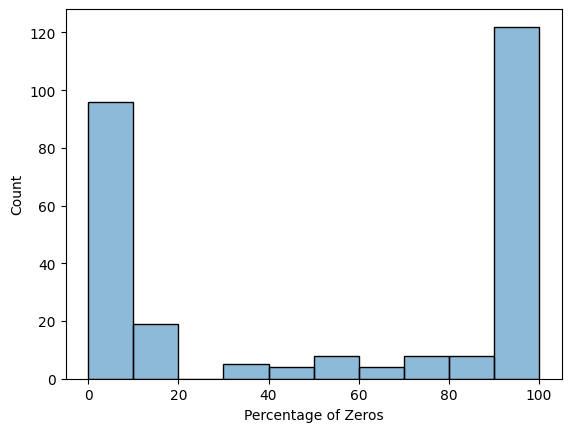

In [347]:
zeros={c: None for c in df.columns}

for c in df.columns:
    count = df[c].value_counts().get(0, 0)/len(df[c])
    if count != 0.0:
        count = (count*100).round(1)
        zeros[c] = count
    else:
        zeros[c] = count

zeros = pd.DataFrame.from_dict(zeros, orient='index', columns=['Percentage'])
zeros.sort_values('Percentage', ascending=False)
categorical_target = ['age', 'sex', 'height', 'weight', 'class']
zeros.drop(categorical_target, axis=0, inplace=True)
sns.histplot(zeros)
plt.gca().set_xlabel('Percentage of Zeros')
plt.gca().get_legend().remove();
print('with so many of the ecg lead columns being 90-100% zeros, it raises the question of how to proceed with them - perhaps taking this into consideration when viewing the correlation data')

# Multivariate Analysis

In combination, sex and age are also quite evenly distributed


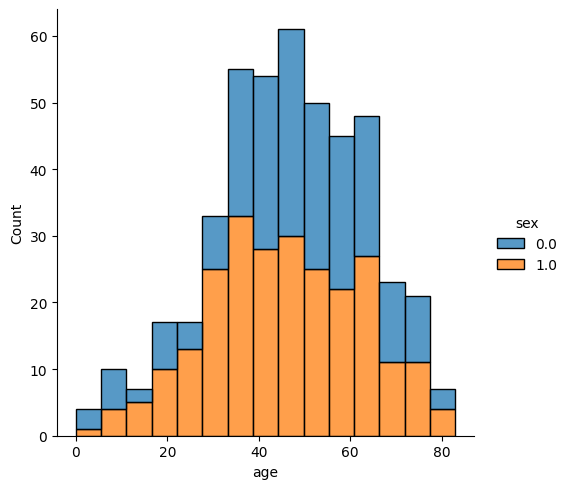

In [348]:
sns.displot(data=df, x="age", hue="sex", multiple="stack");
print('In combination, sex and age are also quite evenly distributed')

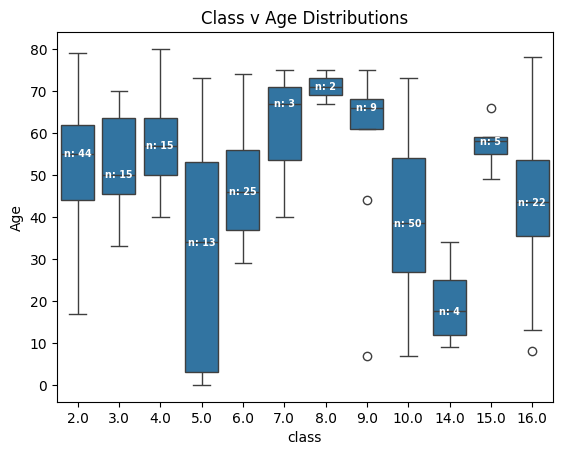

In [349]:
diagnosed=df[df['class'] !=1]


ax = sns.boxplot(data=diagnosed, y='age', x='class')
ax.set(xlabel='class', ylabel='Age')  
ax.set_title('Class v Age Distributions')

medians = diagnosed.groupby(['class'])['age'].median().values
nobs = diagnosed.groupby(['class'])['age'].agg(['count'])
nobs = ["n: " + str(i) for s in nobs.values for i in s]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] - 0.8, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
    

In [350]:
# Continuous variables

print("Median value by diagnosis : ", end="\n\n")
print(df[['sex', 'age', 'weight', 'height',
             'heartrate']].groupby(df['class']).median(),
      end="\n\n")

# Proportions

print("Proportion: ", end="\n\n")
print(
    df.groupby("class")['sex'].value_counts(normalize=True).apply(lambda x: round(x, 2)*100),
    end="\n\n")


Median value by diagnosis : 

       sex   age  weight  height  heartrate
class                                      
1.0    1.0  46.0    68.0   163.0       72.0
2.0    1.0  55.0    70.0   160.5       77.0
3.0    0.0  50.0    74.0   170.0       78.0
4.0    0.0  57.0    76.0   165.0       81.0
5.0    1.0  34.0    51.0   160.0      104.0
6.0    0.0  46.0    66.0   165.0       54.0
7.0    0.0  67.0    74.0   176.0       69.0
8.0    0.0  71.0    79.0   176.5       66.0
9.0    1.0  66.0    72.0   158.0       64.0
10.0   0.0  38.5    63.5   165.0       71.5
14.0   0.0  17.5    51.5   167.0       83.5
15.0   1.0  58.0    78.0   160.0       81.0
16.0   0.0  43.5    70.5   168.0       70.5

Proportion: 

class  sex
1.0    1.0     65.0
       0.0     35.0
2.0    1.0     59.0
       0.0     41.0
3.0    0.0    100.0
4.0    0.0     73.0
       1.0     27.0
5.0    1.0     69.0
       0.0     31.0
6.0    0.0     56.0
       1.0     44.0
7.0    0.0    100.0
8.0    0.0    100.0
9.0    1.0     56.0
    

In [351]:
## Create class vs frequency 
#sorted(df['class'].unique())
counts = {
    "value":[],
    "freq":[]
}

for i in df['class'].unique():
    counts['value'].append(i)
    counts['freq'].append(len(df[df['class'] ==  i]))

    
c = pd.DataFrame(counts)
c.sort_values(by="value")

,value,freq
3,1.0,245
8,2.0,44
6,3.0,15
9,4.0,15
10,5.0,13
1,6.0,25
4,7.0,3
0,8.0,2
11,9.0,9
2,10.0,50


In [352]:
pd.DataFrame(df.columns,columns=["Features"])

,Features
0,age
1,sex
2,height
3,weight
4,QRSduration
5,PRinterval
6,Q-Tinterval
7,Tinterval
8,Pinterval
9,QRS


In [353]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

# Target Analysis

In [354]:
### Different risks instead of classes

norm_risk_list = []

for diagnose in df['class']:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)

df["label"] = np.array(norm_risk_list)

#df.drop(columns = ["diagnosis"],inplace = True)

df.label.value_counts()

label
True     245
False    207
Name: count, dtype: int64

In [355]:
df['label'] = np.where(df["class"] == 1, 0, 1)
df.label.value_counts()

label
0    245
1    207
Name: count, dtype: int64

In [356]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

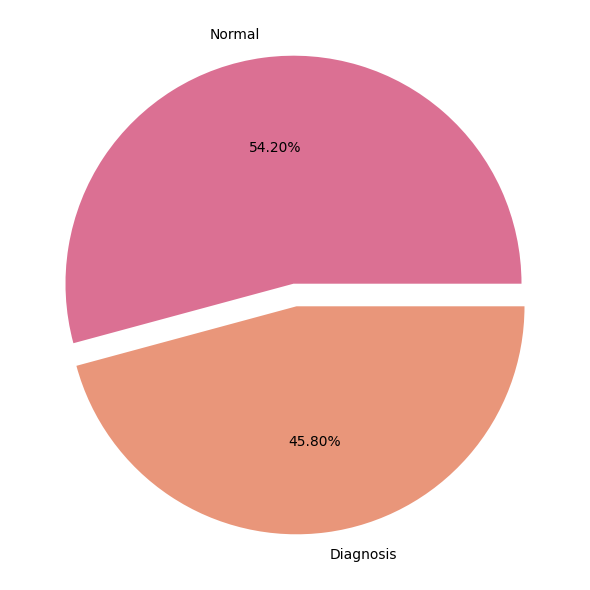

In [357]:
plt.figure(figsize=(6, 6))
plt.grid(color='darkgrey', linestyle='-', linewidth=0.25, alpha=0.5)  # Background grid

# Count the occurrences of each label
label_counts = df['label'].value_counts(normalize=True)

# Plot pie chart with specific style
plt.pie(label_counts, labels=['Normal', 'Diagnosis'], explode=[0.05, 0.05], autopct="%0.2f%%", colors=["palevioletred", "darksalmon"])

#plt.title('Normal vs Diagnosis')
plt.tight_layout()
plt.savefig('Normal_vs_Diagnosis_Piechart.png')
plt.show()

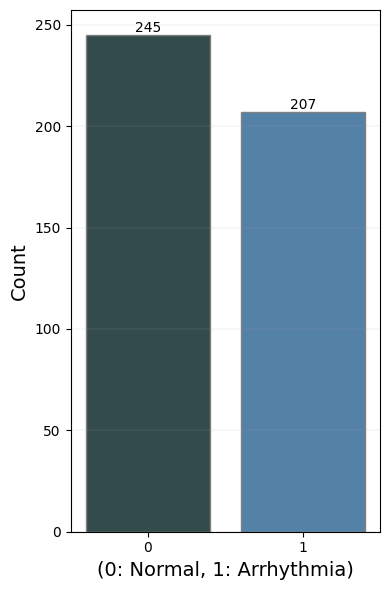

In [358]:
#First: Barplot showcasing case counts of normal and high risk 

plt.figure(figsize=(4, 6))
plt.grid(color='darkgrey', linestyle='-', linewidth=0.25, alpha=0.5)  # Background grid
ax = sns.countplot(data=df, x='label', edgecolor='grey', palette={'0': 'darkslategrey', '1': 'steelblue'})
#ax.set_facecolor('lightgrey')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            '{:.0f}'.format(p.get_height()), 
            ha='center', va='bottom')
#plt.title('Normal vs Diagnosis', fontsize=14)
plt.xlabel('(0: Normal, 1: Arrhythmia)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout() 
plt.savefig('Normal_vs_Diagnosis_Barplot.png')  
plt.show(); 


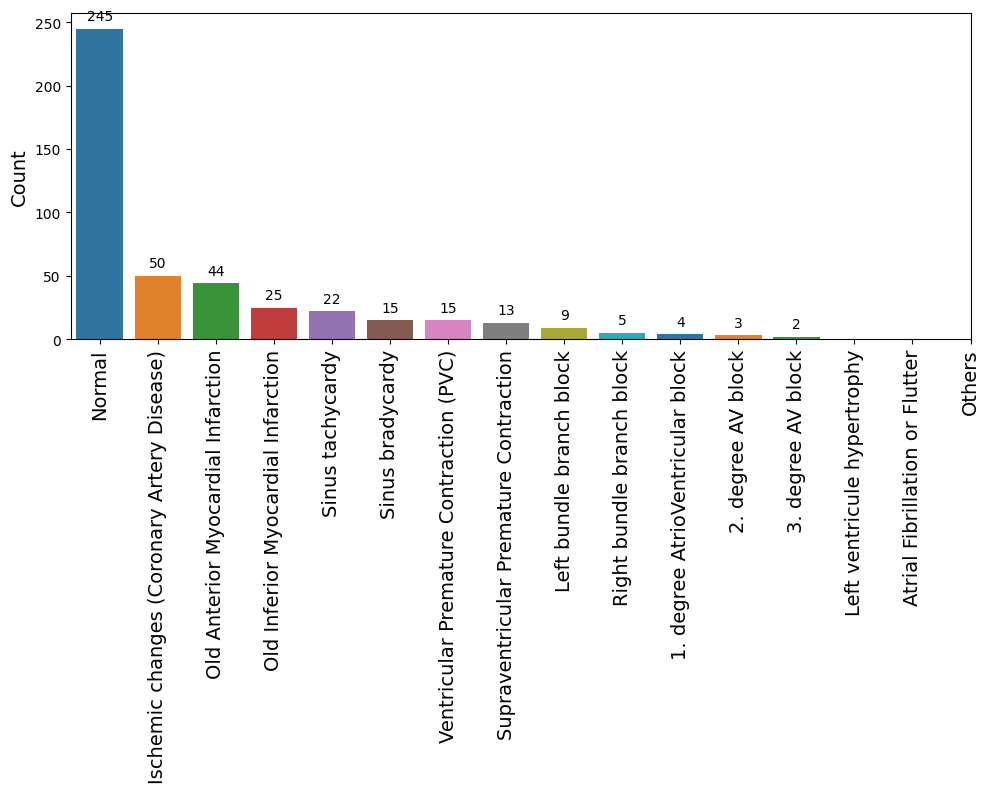

In [359]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]


# Define the class labels
class_labels = [
    "Normal",
    "Ischemic changes (Coronary Artery Disease)",
    "Old Anterior Myocardial Infarction",
    "Old Inferior Myocardial Infarction",
    "Sinus tachycardy",
    "Sinus bradycardy",
    "Ventricular Premature Contraction (PVC)",
    "Supraventricular Premature Contraction",
    "Left bundle branch block",
    "Right bundle branch block",
    "1. degree AtrioVentricular block",
    "2. degree AV block",
    "3. degree AV block",
    "Left ventricule hypertrophy",
    "Atrial Fibrillation or Flutter",
    "Others"
]

plt.figure(figsize=(10, 8))

ax = sns.countplot(data=df, x="class", palette=custom_palette, order=df["class"].value_counts().index)
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=90, fontsize=14)


# Add annotations to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.ylabel('Count', fontsize=14)
plt.xlabel('', fontsize=14)
plt.tight_layout() 

plt.savefig('Countplot_classes.png') 
plt.show()

In [360]:
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to label
dtypes: float64(279), int64(1)
memory usage: 988.9 KB


0

# Correlation Analysis

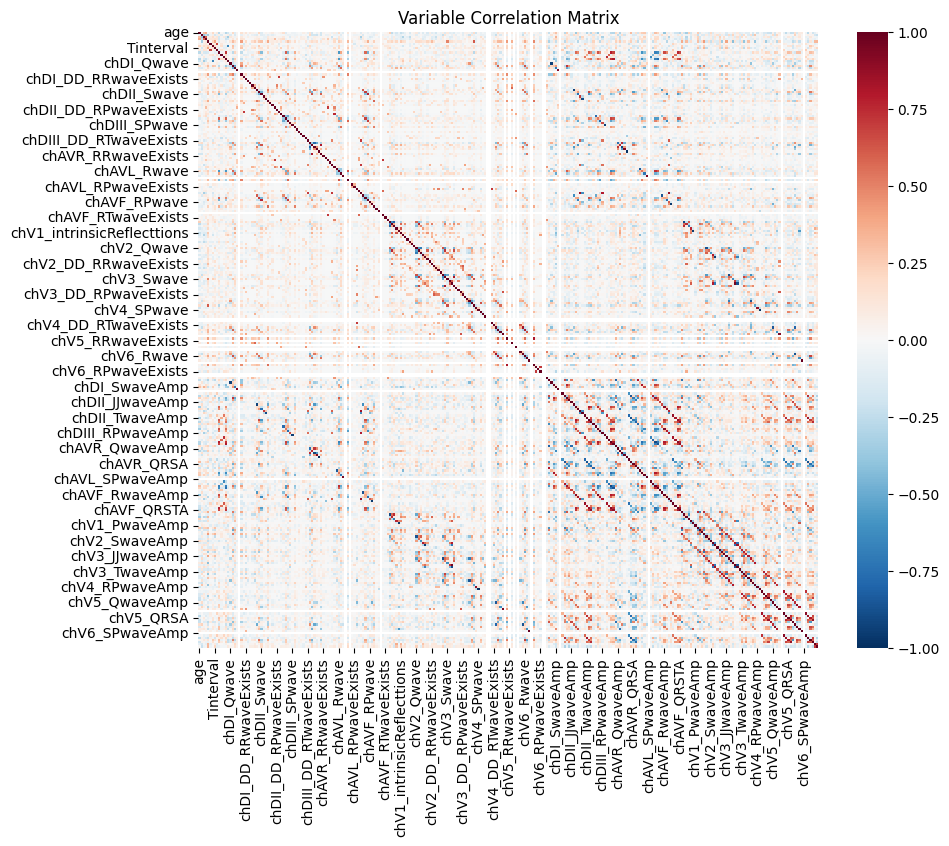

<Figure size 1500x600 with 0 Axes>

In [361]:
## Variable correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), fmt=".2f",cmap="RdBu_r", center =0);
plt.title('Variable Correlation Matrix')
plt.figure(figsize=(15, 6))
plt.tight_layout() 
#plt.savefig('Variable_corr_matrix.png')  
plt.show()

In [362]:
# OPTION ONE - Threshhold
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor['class'])
#Selecting highly correlated features
signif_features = cor_target[cor_target>0.01]
signif_features.index

Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV5_QRSTA', 'chV6_JJwaveAmp', 'chV6_QwaveAmp', 'chV6_RwaveAmp',
       'chV6_SwaveAmp', 'chV6_RPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp',
       'class', 'label'],
      dtype='object', length=226)

In [363]:
## OPTION TWO
## Select only interesting columns Delete all unimportant columns
## NOTE: selected only general columns and columns of channel DI
selected_columns = pd.concat([df.iloc[:, 0:27], df.iloc[:, 159:170], df.iloc[:, -1]], axis=1)
# Create a new DataFrame with selected columns
df_subset= pd.DataFrame(selected_columns)
df_subset.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,label
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,13.0,64.0,-2.0,63.0,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,53.0,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,1
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,75.0,0.0,40.0,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,71.0,0.0,72.0,20.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8,-0.7,0.0,0.0,1.1,1.9,27.3,45.1,0.1,0.0,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,69.0,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,-1.4,0.0,0.0,0.9,2.3,9.6,31.6,0.1,0.0,1


In [364]:
## Create subset of dataset based on high correlations
corr = df.corr()
cor_target = abs(corr['label'])
features = cor_target[cor_target > 0.2]

# Extract subset of dataframe with highly correlated features
df_subset_1 = df[features.index]
df_subset_1.drop(columns=['class'], inplace=True)
df_subset_1.head()

,sex,QRSduration,Tinterval,chV1_RPwave,chV1_intrinsicReflecttions,chV2_Qwave,chV2_RPwave,chV3_Qwave,chDI_SwaveAmp,chDI_TwaveAmp,chDI_QRSTA,chDII_SwaveAmp,chDII_TwaveAmp,chDII_QRSTA,chAVR_TwaveAmp,chAVR_QRSTA,chAVL_TwaveAmp,chV1_RPwaveAmp,chV1_QRSTA,chV2_QwaveAmp,chV3_QwaveAmp,chV3_QRSA,chV3_QRSTA,chV5_TwaveAmp,chV6_TwaveAmp,chV6_QRSTA,label
0,0.0,91.0,174.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.1,30.8,-1.0,1.5,14.5,-1.7,-22.0,1.2,0.0,-29.7,0.0,0.0,-3.9,52.7,3.9,2.9,49.4,1
1,1.0,81.0,149.0,0.0,16.0,0.0,0.0,0.0,0.0,1.5,26.5,0.0,1.7,29.5,-1.6,-25.5,0.7,0.0,-26.8,0.0,0.0,-5.7,27.7,2.6,2.1,38.8,1
2,0.0,138.0,185.0,76.0,100.0,0.0,60.0,0.0,-2.8,2.5,19.8,-1.3,2.7,37.9,-2.5,-28.5,1.0,6.5,-13.6,0.0,0.0,20.4,23.3,3.4,3.4,49.0,1
3,0.0,100.0,179.0,0.0,0.0,0.0,0.0,0.0,-0.7,1.9,45.1,-2.6,1.5,36.8,-1.7,-35.6,1.2,0.0,-22.4,0.0,0.0,7.6,51.0,3.0,2.6,61.6,0
4,0.0,88.0,177.0,0.0,0.0,0.0,0.0,0.0,-1.4,2.3,31.6,-0.5,1.7,18.9,-1.5,-17.8,1.1,0.0,-30.0,0.0,0.0,-4.0,43.0,2.9,3.9,62.8,1


In [365]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

In [366]:
### Select subset using SelectKBest

data = df.drop(columns= ['label','class'])
target = df['label']
sk = SelectKBest(f_regression, k=20)

sk.fit(X = data, y = target)

data.columns[sk.get_support()]

Index(['sex', 'QRSduration', 'Tinterval', 'chV1_RPwave',
       'chV1_intrinsicReflecttions', 'chV2_Qwave', 'chV2_RPwave', 'chV3_Qwave',
       'chDI_TwaveAmp', 'chDI_QRSTA', 'chDII_TwaveAmp', 'chDII_QRSTA',
       'chAVR_TwaveAmp', 'chAVR_QRSTA', 'chAVL_TwaveAmp', 'chV3_QRSA',
       'chV3_QRSTA', 'chV5_TwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSTA'],
      dtype='object')

In [367]:
df_subset_1.columns

Index(['sex', 'QRSduration', 'Tinterval', 'chV1_RPwave',
       'chV1_intrinsicReflecttions', 'chV2_Qwave', 'chV2_RPwave', 'chV3_Qwave',
       'chDI_SwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSTA', 'chDII_SwaveAmp',
       'chDII_TwaveAmp', 'chDII_QRSTA', 'chAVR_TwaveAmp', 'chAVR_QRSTA',
       'chAVL_TwaveAmp', 'chV1_RPwaveAmp', 'chV1_QRSTA', 'chV2_QwaveAmp',
       'chV3_QwaveAmp', 'chV3_QRSA', 'chV3_QRSTA', 'chV5_TwaveAmp',
       'chV6_TwaveAmp', 'chV6_QRSTA', 'label'],
      dtype='object')

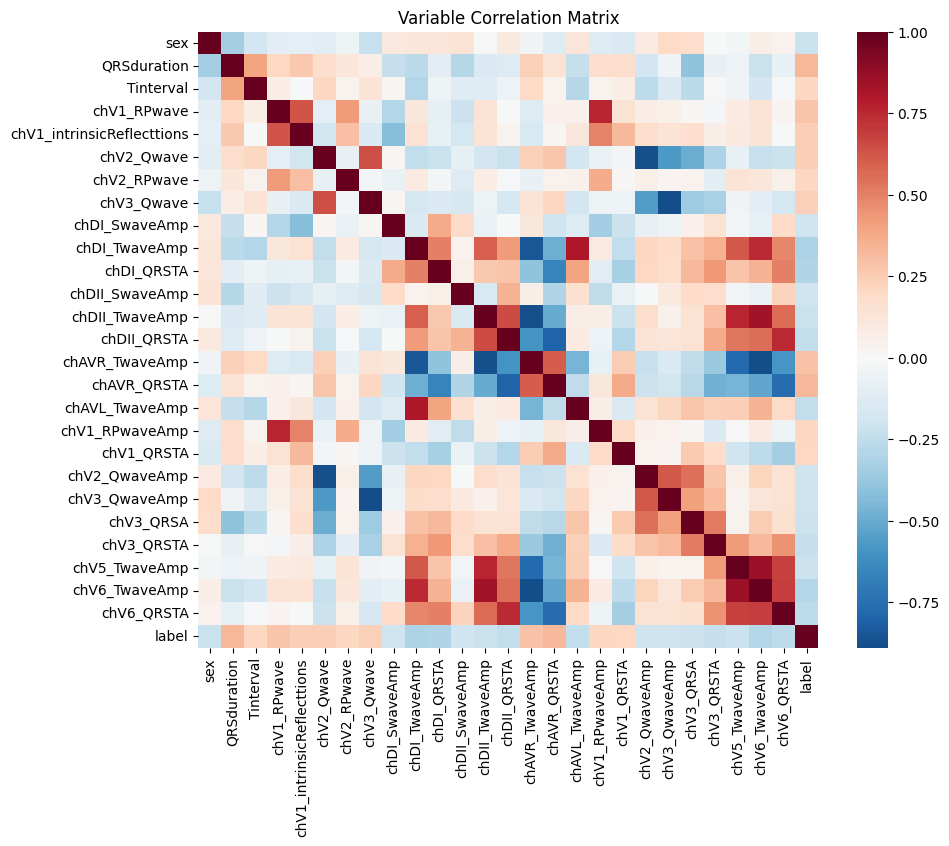

<Figure size 1500x600 with 0 Axes>

In [368]:
## Variable correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(df_subset_1.corr(), fmt=".2f",cmap="RdBu_r", center =0);
plt.title('Variable Correlation Matrix')
plt.figure(figsize=(15, 6))
plt.tight_layout() 
plt.savefig('Variable_corr_matrix_subset1.png')  
plt.show()

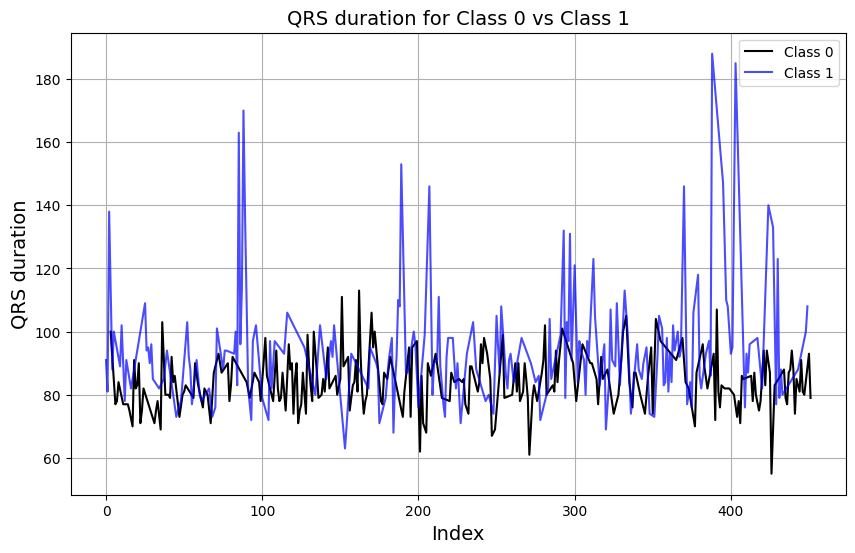

In [369]:
QRSdur_0 = df[df['label'] == 0]['QRSduration']
QRSdur_1 = df[df['label'] == 1]['QRSduration']

# Plot QRS duration for class 0 and class 1
plt.figure(figsize=(10, 6))
plt.plot(QRSdur_0, label='Class 0', color='black')
plt.plot(QRSdur_1, label='Class 1', color='blue', alpha =0.7)

plt.title('QRS duration for Class 0 vs Class 1', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('QRS duration', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('QRS_duration.png')  
plt.show()

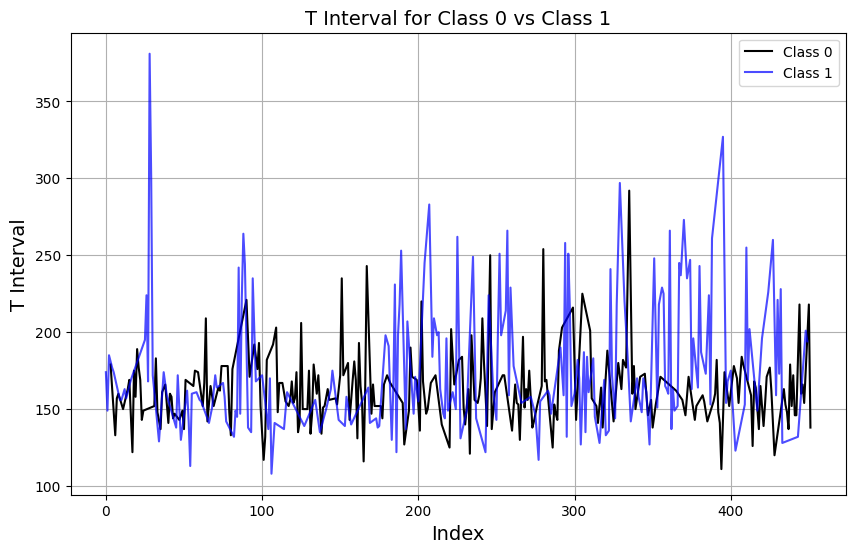

In [370]:
T_interval_0 = df[df['label'] == 0]['Tinterval']
T_interval_1 = df[df['label'] == 1]['Tinterval']

# Plot T interval for class 0 and class 1
plt.figure(figsize=(10, 6))
plt.plot(T_interval_0, label='Class 0', color='black')
plt.plot(T_interval_1, label='Class 1', color='blue', alpha=0.7)

plt.title('T Interval for Class 0 vs Class 1', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('T Interval', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('T_interval.png')
plt.show()

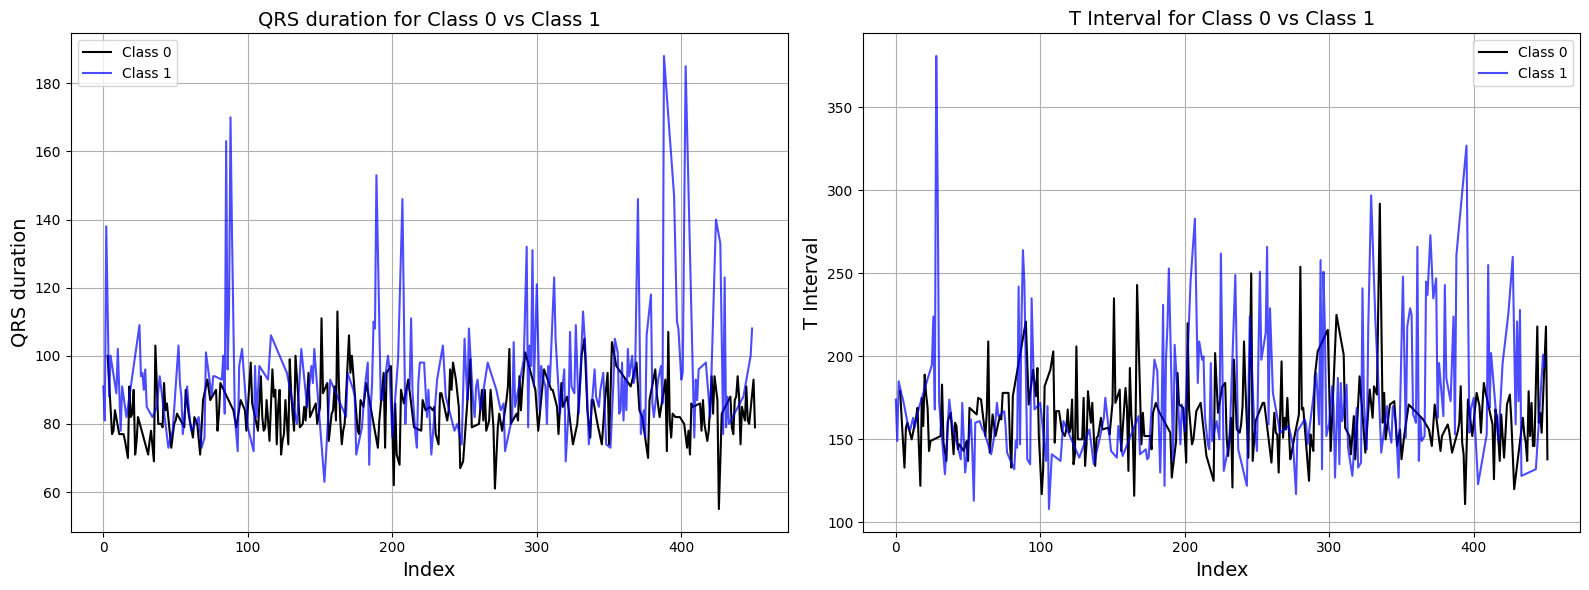

In [371]:

# Define the data for the first plot
QRSdur_0 = df[df['label'] == 0]['QRSduration']
QRSdur_1 = df[df['label'] == 1]['QRSduration']

# Plot QRS duration for class 0 and class 1
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First subplot for QRS duration
axs[0].plot(QRSdur_0, label='Class 0', color='black')
axs[0].plot(QRSdur_1, label='Class 1', color='blue', alpha=0.7)
axs[0].set_title('QRS duration for Class 0 vs Class 1', fontsize=14)
axs[0].set_xlabel('Index', fontsize=14)
axs[0].set_ylabel('QRS duration', fontsize=14)
axs[0].legend()
axs[0].grid(True)

# Define the data for the second plot
T_interval_0 = df[df['label'] == 0]['Tinterval']
T_interval_1 = df[df['label'] == 1]['Tinterval']

# Second subplot for T interval
axs[1].plot(T_interval_0, label='Class 0', color='black')
axs[1].plot(T_interval_1, label='Class 1', color='blue', alpha=0.7)
axs[1].set_title('T Interval for Class 0 vs Class 1', fontsize=14)
axs[1].set_xlabel('Index', fontsize=14)
axs[1].set_ylabel('T Interval', fontsize=14)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('Combined_Plots_QRS_T_interval.png')
plt.show()

In [372]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,chDIII_Rwave,chDIII_Swave,chDIII_RPwave,chDIII_SPwave,chDIII_intrinsicReflecttions,chDIII_RRwaveExists,chDIII_DD_RRwaveExists,chDIII_RPwaveExists,chDIII_DD_RPwaveExists,chDIII_RTwaveExists,chDIII_DD_RTwaveExists,chAVR_Qwave,chAVR_Rwave,chAVR_Swave,chAVR_RPwave,chAVR_SPwave,chAVR_intrinsicReflecttions,chAVR_RRwaveExists,chAVR_DD_RRwaveExists,chAVR_RPwaveExists,chAVR_DD_RPwaveExists,chAVR_RTwaveExists,chAVR_DD_RTwaveExists,chAVL_Qwave,chAVL_Rwave,chAVL_Swave,chAVL_RPwave,chAVL_SPwave,chAVL_intrinsicReflecttions,chAVL_RRwaveExists,chAVL_DD_RRwaveExists,chAVL_RPwaveExists,chAVL_DD_RPwaveExists,chAVL_RTwaveExists,chAVL_DD_RTwaveExists,chAVF_Qwave,chAVF_Rwave,chAVF_Swave,chAVF_RPwave,chAVF_SPwave,chAVF_intrinsicReflecttions,chAVF_RRwaveExists,chAVF_DD_RRwaveExists,chAVF_RPwaveExists,chAVF_DD_RPwaveExists,chAVF_RTwaveExists,chAVF_DD_RTwaveExists,chV1_Qwave,chV1_Rwave,chV1_Swave,chV1_RPwave,chV1_SPwave,chV1_intrinsicReflecttions,chV1_RRwaveExists,chV1_DD_RRwaveExists,chV1_RPwaveExists,chV1_DD_RPwaveExists,chV1_RTwaveExists,chV1_DD_RTwaveExists,chV2_Qwave,chV2_Rwave,chV2_Swave,chV2_RPwave,chV2_SPwave,chV2_intrinsicReflecttions,chV2_RRwaveExists,chV2_DD_RRwaveExists,chV2_RPwaveExists,chV2_DD_RPwaveExists,chV2_RTwaveExists,chV2_DD_RTwaveExists,chV3_Qwave,chV3_Rwave,chV3_Swave,chV3_RPwave,chV3_SPwave,chV3_intrinsicReflecttions,chV3_RRwaveExists,chV3_DD_RRwaveExists,chV3_RPwaveExists,chV3_DD_RPwaveExists,chV3_RTwaveExists,chV3_DD_RTwaveExists,chV4_Qwave,chV4_Rwave,chV4_Swave,chV4_RPwave,chV4_SPwave,chV4_intrinsicReflecttions,chV4_RRwaveExists,chV4_DD_RRwaveExists,chV4_RPwaveExists,chV4_DD_RPwaveExists,chV4_RTwaveExists,chV4_DD_RTwaveExists,chV5_Qwave,chV5_Rwave,chV5_Swave,chV5_RPwave,chV5_SPwave,chV5_intrinsicReflecttions,chV5_RRwaveExists,chV5_DD_RRwaveExists,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_Qwave,chV6_Rwave,chV6_Swave,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,chDI_JJwaveAmp,chDI_QwaveAmp,chDI_RwaveAmp,chDI_SwaveAmp,chDI_RPwaveAmp,chDI_SPwaveAmp,chDI_PwaveAmp,chDI_TwaveAmp,chDI_QRSA,chDI_QRSTA,chDII_JJwaveAmp,chDII_QwaveAmp,chDII_RwaveAmp,chDII_SwaveAmp,chDII_RPwaveAmp,chDII_SPwaveAmp,chDII_PwaveAmp,chDII_TwaveAmp,chDII_QRSA,chDII_QRSTA,chDIII_JJwaveAmp,chDIII_QwaveAmp,chDIII_RwaveAmp,chDIII_SwaveAmp,chDIII_RPwaveAmp,chDIII_SPwaveAmp,chDIII_PwaveAmp,chDIII_TwaveAmp,chDIII_QRSA,chDIII_QRSTA,chAVR_JJwaveAmp,chAVR_QwaveAmp,chAVR_RwaveAmp,chAVR_SwaveAmp,chAVR_RPwaveAmp,chAVR_SPwaveAmp,chAVR_PwaveAmp,chAVR_TwaveAmp,chAVR_QRSA,chAVR_QRSTA,chAVL_JJwaveAmp,chAVL_QwaveAmp,chAVL_RwaveAmp,chAVL_SwaveAmp,chAVL_RPwaveAmp,chAVL_SPwaveAmp,chAVL_PwaveAmp,chAVL_TwaveAmp,chAVL_QRSA,chAVL_QRSTA,chAVF_JJwaveAmp,chAVF_QwaveAmp,chAVF_RwaveAmp,chAVF_SwaveAmp,chAVF_RPwaveAmp,chAVF_SPwaveAmp,chAVF_PwaveAmp,chAVF_TwaveAmp,chAVF_QRSA,chAVF_QRSTA,chV1_JJwaveAmp,chV1_QwaveAmp,chV1_RwaveAmp,chV1_SwaveAmp,chV1_RPwaveAmp,chV1_SPwaveAmp,chV1_PwaveAmp,chV1_TwaveAmp,chV1_QRSA,chV1_QRSTA,chV2_JJwaveAmp,chV2_QwaveAmp,chV2_RwaveAmp,chV2_SwaveAmp,chV2_RPwaveAmp,chV2_SPwaveAmp,chV2_PwaveAmp,chV2_TwaveAmp,chV2_QRSA,chV2_QRSTA,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_Q

In [373]:
#df.to_csv('arrhythmia_preprocessed_cleaned_classes_label.csv')